In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.pyplot import imshow
from tqdm import tqdm
import torch
from torchsummary import summary

from collections import namedtuple, defaultdict
from pathlib import Path
import time

%matplotlib inline
rcParams['figure.figsize'] = (10, 15)

In [2]:
import sys
sys.path.append('..')
import os
os.environ['SM_CHANNEL_TRAINING'] = '../../../train/'

In [3]:
from src.constructor.config_structure import TrainConfigParams
from src.registry import TASKS
from src.constructor.data import create_dataset
from train import load_config

In [4]:
config_path = '../examples/configs/detection.yml'
config_yaml = load_config(config_path)
config = TrainConfigParams(**config_yaml)

In [5]:
data_params = config.data
dataset_name = data_params.train_params.name
common_params = data_params.common_params
other_params = data_params.train_params
# other_params = data_params.valid_params
# other_params = data_params.test_params

dataset = create_dataset(dataset_name, common_params, other_params)

In [6]:
dataset[0]

Compose([
  Resize(always_apply=False, p=1, height=640, width=640, interpolation=1),
], p=1.0, bbox_params={'format': 'yolo', 'label_fields': ['category_ids'], 'min_area': 0.0, 'min_visibility': 0.0, 'check_each_transform': True}, keypoint_params=None, additional_targets={})


{'input': tensor([[[ 0.5688,  0.5605,  0.5845,  ...,  0.3726,  0.3726,  0.3176],
          [ 0.5688,  0.5688,  0.5923,  ...,  0.4038,  0.4038,  0.4038],
          [ 0.5605,  0.5767,  0.5688,  ...,  0.4353,  0.4431,  0.4353],
          ...,
          [ 0.2549,  0.2000,  0.2942,  ...,  0.2313,  0.2079,  0.0902],
          [ 0.2235,  0.3098,  0.2942,  ...,  0.2627,  0.2783,  0.2783],
          [ 0.4980,  0.2627,  0.2471,  ...,  0.2079,  0.2079,  0.2235]],
 
         [[ 0.7725,  0.7646,  0.7725,  ...,  0.6001,  0.5767,  0.5767],
          [ 0.7725,  0.7725,  0.7725,  ...,  0.6001,  0.6001,  0.5923],
          [ 0.7725,  0.7803,  0.7568,  ...,  0.6235,  0.6392,  0.6157],
          ...,
          [ 0.0588,  0.0196,  0.0902,  ...,  0.0510,  0.0196, -0.1451],
          [-0.0353,  0.0902,  0.0980,  ...,  0.0039,  0.0275,  0.0588],
          [ 0.3098,  0.0980,  0.1059,  ..., -0.0588, -0.0510,  0.0432]],
 
         [[ 0.9453,  0.9453,  0.9766,  ...,  0.8901,  0.8901,  0.8745],
          [ 0.9609,

In [7]:
model = TASKS.get(config.task.name)(config)
# model = model.to(device)
# model.load_state_dict(checkpoint['state_dict'])
# model.eval();
model

AttributeError: 'DetectionTaskParams' object has no attribute 'infer_name'

In [22]:
import matplotlib.pyplot as plt

img = dataset[0]['input'].numpy()
plt.imshow(np.moveaxis(img, 0, -1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: Unsupported dtype

<Figure size 720x1080 with 1 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


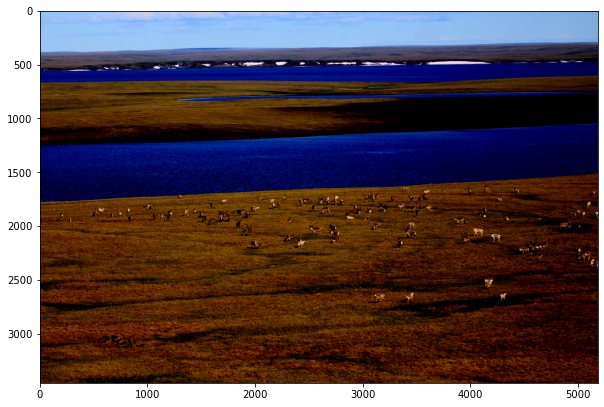

In [29]:
new_img = (255* np.moveaxis(img, 0, -1)).astype(np.int32)
new_img.shape
plt.imshow(new_img)

In [7]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [8]:
def decode_img(tensor):
    tensor = tensor.permute(1, 2, 0).detach().cpu().numpy()
    return (np.clip(tensor * std + mean, 0., 1.) * 255).astype(np.uint8)

NotImplementedError: iLocation based boolean indexing on an integer type is not available

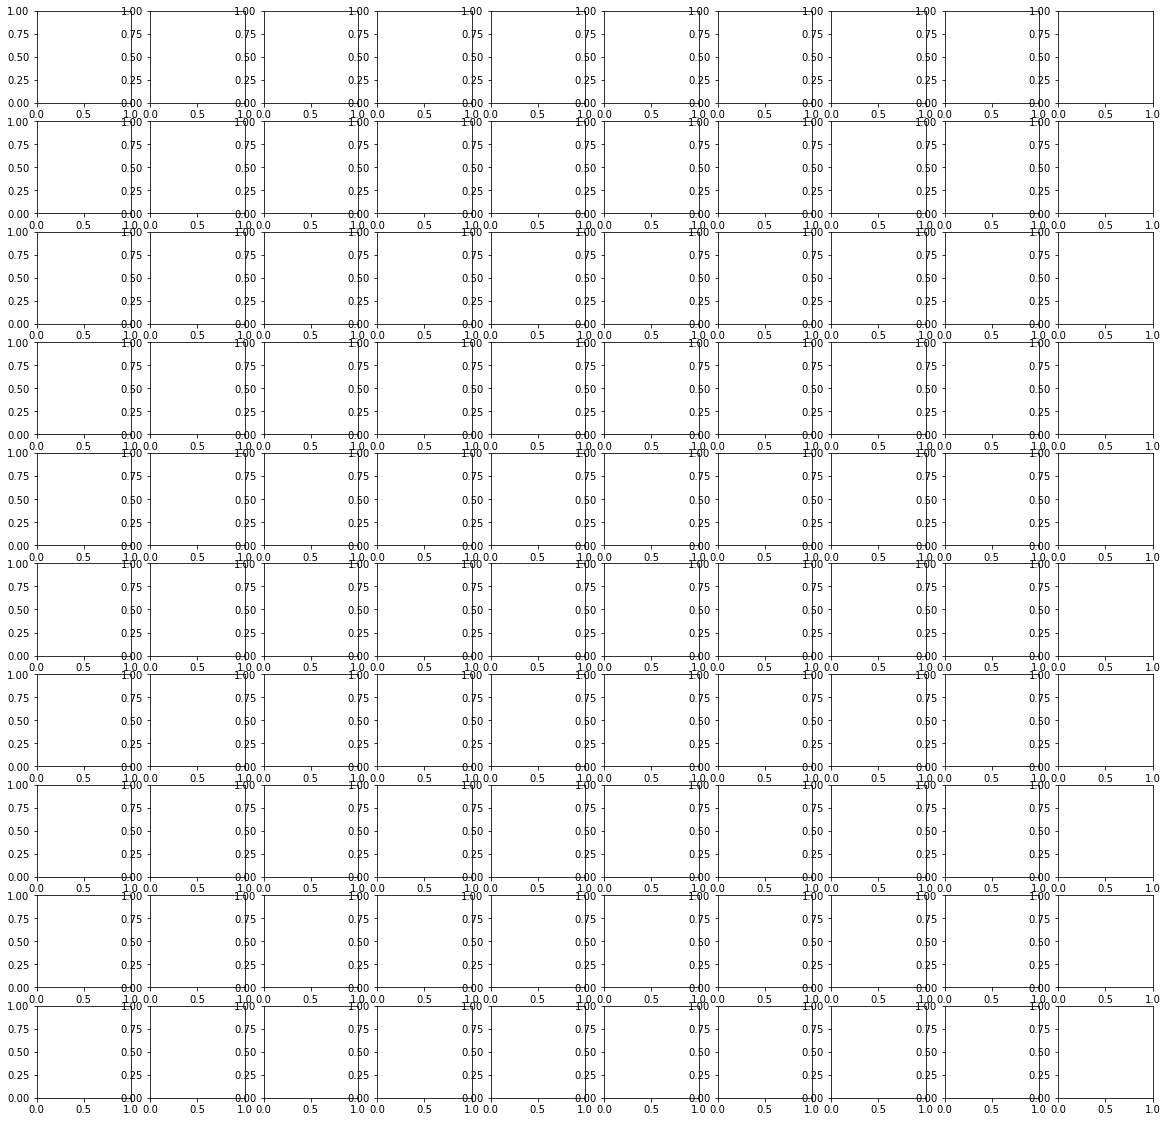

In [9]:
start_idx = 400
n_imgs = 100
n_cols = 10
fig, axs = plt.subplots(n_imgs // n_cols, n_cols, figsize=(20, 2 * n_imgs // n_cols))

targets = []
for i in range(n_imgs):
    sample = dataset[start_idx + i]
    img = decode_img(sample['input'])
    targets.append(sample['target'])
    axs[i // n_cols][i % n_cols].imshow(img)